###  Let's says, the carseats sales manager who is managing 400 stores wants to be the top sales manager in the company. The manager is wondering how much sales other stores are doing now. However the manager only knows his/her sales information and can access informational data other than sales for other stores. To find out sales amount of other stores, the manager is going to build a sales predictive model(regression model), so the manager can assume how much carseats sales are doing in other stores.

1. Data Undestanding

     1.1 Description
     
     1.2 Features

2. EDA

    2.1 Data Collection 
    
    2.2 Data Integration
    
    2.3 Data Preparing and Cleaning
    
    2.4 Data Visualization and Analysis
    
    2.5 Feature Engineering
 
3. Modeling

    3.1 Random Forest 
    
    3.2 Bagging Ensemble
    
    3.3 AdaBoost
    
    3.4 Gradient Boost
    
    3.5 XGboost
    
    3.6 LightGBM
    
4. Conclusion


## 1. Data Undestanding
    
     Carseats : Sales of Child Car Seats
     
     Data source : https://rdrr.io/cran/ISLR/man/Carseats.html
     
     In ISLR: Data for an Introduction to Statistical Learning with Applications in R

#### 1.1 Description : A simulated data set containing sales of child car seats at 400 different stores

#### 1.2 A data frame with 400 observations on the following 11 variables.

    * Sales : Target Variable
    Unit sales (in thousands) at each location

    * CompPrice : 
    Price charged by competitor at each location

    * Income : 
    Community income level (in thousands of dollars)

    * Advertising : 
    Local advertising budget for company at each location (in thousands of dollars)

    * Population : 
    Population size in region (in thousands)

    * Price : 
    Price company charges for car seats at each site

    * ShelveLoc : 
    A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

    * Age : 
    Average age of the local population

    * Education : 
    Education level at each location

    * Urban : 
    A factor with levels No and Yes to indicate whether the store is in an urban or rural location

    * US : 
    A factor with levels No and Yes to indicate whether the store is in the US or not


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

## 2. EDA
#### 2.1 Data collection

        Collect 400 store carseats data
        
#### 2.2 Data integration

        We have "Carseats.csv" data file
        
#### 2.3 Data preparation and cleaning

        Load data in python

In [ ]:
# load and display dataset
carseats_df = pd.read_csv('../input/carseats/Carseats.csv')

carseats_df.head()

In [ ]:
carseats_df.info()

In [ ]:
#Null value check
carseats_df.isnull().sum()

#### 2.4 Data Visualization and analysis
                  
        (1)Features 
        - Categorical Variables : ShelveLoc, Urban, US, Education
         (Despite "Educatoin" data type is integer in original data set, 
         we cannot tell differences of each level of educations 
         have same numerical meaning. Thus I put 'Education' in categorical variable)
         
        - Continuous Variables  : CompPrice, Income, Advertising, Population, Price, Age
        
        (2)Target 
        - Sales

In [ ]:
carseats_df['Education'] = carseats_df['Education'].astype(str)

In [ ]:
carseats_df.info()

In [ ]:
# Visulazing the distibution of the data for every feature
carseats_df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [ ]:
# Target Sales : Skewness check
carseats_df['Sales'].skew()

Great! 'Sales' doesn't look like skew

In [ ]:
# Categorical features : Value check
cat_cols = ['Education', 'ShelveLoc', 'Urban', 'US']
for col in cat_cols:
    print(f"Feature Name {col} : \n{carseats_df[col].value_counts()}")

In [ ]:
#Education
sns.boxplot(x="Education", y="Sales", data=carseats_df)

In [ ]:
#ShelveLoc
sns.boxplot(x="ShelveLoc", y="Sales", data=carseats_df)
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(carseats_df['Sales'].loc[carseats_df['ShelveLoc'] == 'Medium'], color="dodgerblue", label="Medium")
sns.distplot(carseats_df['Sales'].loc[carseats_df['ShelveLoc'] == 'Good'], color="orange", label="Good")
sns.distplot(carseats_df['Sales'].loc[carseats_df['ShelveLoc'] == 'Bad'], color="deeppink", label="Bad")
plt.legend()

In [ ]:
#Urban
sns.boxplot(x="Urban", y="Sales", data=carseats_df)
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(carseats_df['Sales'].loc[carseats_df['Urban'] == 'Yes'], color="dodgerblue", label="Yes")
sns.distplot(carseats_df['Sales'].loc[carseats_df['Urban'] == 'No'], color="orange", label="No")
plt.legend()

In [ ]:
#US
sns.boxplot(x="US", y="Sales", data=carseats_df)
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(carseats_df['Sales'].loc[carseats_df['US'] == 'Yes'], color="dodgerblue", label="Yes")
sns.distplot(carseats_df['Sales'].loc[carseats_df['US'] == 'No'], color="orange", label="No")
plt.show()

We learned that

* "Shelveloc" is related to Sales as disribution(mean, max, min) of sales is different by Shelveloc's category
* Either "Urban: yes" or "Urban : no" doesn't matter for Sales
* US is slightly related to Sales : stores in US show a little higher sales than others. 
* Sales mean shows difference by Educaiton levels.

In [ ]:
#find correlation between continuous variables and Sales
plt.figure(figsize=(30, 30))
sns.heatmap(carseats_df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

We learned the followings,
* Price is highly correlated with Sales (negative correlation)
* Advertising is slightly correlatied with Sales (positive correlation)
* Age is also slightly correlatied with Sales (positive correlation) 
* Price and CompPrice are correlated. They have collinearity.

In [ ]:
# Visulazing the distibution of the data for every feature with Sales
cont_cols = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age']
for col in cont_cols:
    plt.figure(figsize=(10,10), dpi= 80)
    plt.scatter(x=col, y='Sales', data=carseats_df)
    plt.xlabel(f"{col}")
    plt.ylabel('Sales')
    plt.show()

### 2.4 Feature Engineering

In [ ]:
carseats_df['PriceDiff'] = carseats_df['Price'] - carseats_df['CompPrice']
corr_df = carseats_df[['Sales', 'PriceDiff']]
corr_df.corr()

* "Price Difference" brings a correlation improving and removing a collinearity between "Price" and "CompPrice"

In [ ]:
plt.figure(figsize=(10,10), dpi= 80)
plt.scatter(x='PriceDiff', y='Sales', data=carseats_df)
plt.xlabel('Price Difference')
plt.ylabel('Sales')
plt.show()

In [ ]:
# advertising size rate(%) per population
carseats_df['Advt_per_popln_pct'] = carseats_df['Advertising']/carseats_df['Population']*100
corr_df = carseats_df[['Sales', 'Advt_per_popln_pct', 'Advertising','Population']]
corr_df.corr()

Well, Advertising size rate per population doesn't look like significant new variable. Then I'm going to drop it.

In [ ]:
#Get Dummies
X = carseats_df.drop(['Sales', 'Price', 'CompPrice', 'Advt_per_popln_pct'], axis=1)
y = carseats_df['Sales']

X = pd.get_dummies(X)
X.head()

## 3. Modeling

### 3.1 Random Forest
    3.1.1 Train / Test Split 
          Standardization
    3.1.2 Base modeling : Decision Tree Regression
          : Can check base score(MSE, RMSE)
    3.1.3 Tree Visualization 
    3.1.4 Hyperparameter Tuning
    3.1.5 Random Forest modeling

In [ ]:
#3.1.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train features shape: {}'.format(X_train.shape))
print('Train labels shape: {}'.format(y_train.shape))
print('Test features shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(y_test.shape))


In [ ]:
#3.1.2 Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg_dt= DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=2, max_depth=3, random_state=42)
reg_dt.fit(X_train, y_train)

pred = reg_dt.predict(X_test)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

print(f"MSE : {MSE}, RMSE : {RMSE}")

In [ ]:
#3.1.3 Tree Visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X.columns)

In [ ]:
dot_data = StringIO()
export_graphviz(reg_dt, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
#Variance Important Plot

plot_df = pd.DataFrame({'feature':X_train.columns, 'importance': reg_dt.feature_importances_})

plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False), color='b')
plt.xticks(rotation=90);

### According to Feature Importance, I can drop variables except PriceDiff, ShelveLoc_Good, Age, but I will keep all variables.

In [ ]:
#X_train = X_train[['PriceDiff', 'ShelveLoc_Good', 'Age']]
#X_test = X_test[['PriceDiff', 'ShelveLoc_Good', 'Age']]

In [ ]:
#3.1.4 Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

reg_dt = DecisionTreeRegressor(random_state=42)
param_grid = [{'max_depth':[i for i in range (1, 31)]}]
               
reg_cv = GridSearchCV(reg_dt, param_grid, cv=5, scoring='neg_mean_squared_error')
reg_cv.fit(X_train, y_train)

In [ ]:
# predict, RMSE
reg_cv.predict(X_test)
cv_result = pd.DataFrame(reg_cv.cv_results_)

plt.figure(figsize=(10,7))
for row in cv_result.itertuples():
    #print(f"max_depth : {row[5]}, RMSE : {np.sqrt(-row[12])}")
    plt.scatter(x=row[5], y=np.sqrt(-row[12]))

plt.xlabel("max depth")
plt.ylabel("RMSE")
plt.show()

In [ ]:
print(f"Best Max Depth : {reg_cv.best_estimator_}")

3.1.5 Random Forest

To Improve MSE, I am going to build Ensemble model, RandomForrest

In [ ]:
# Hyperparameter tuning :  bagging  - tree size

max_features = X_train.shape[1]
reg_rf = RandomForestRegressor(max_features=max_features, max_depth=7, random_state=42)

param_grid = [{'n_estimators':[i for i in range (50, 550, 50)]}]
               
reg_cv = GridSearchCV(reg_rf, param_grid, cv=5, scoring='neg_mean_squared_error')
reg_cv.fit(X_train, y_train)

# predict, RMSE
reg_cv.predict(X_test)
cv_result = pd.DataFrame(reg_cv.cv_results_)

plt.figure(figsize=(10,7))
for row in cv_result.itertuples():
    plt.scatter(x=row[5], y=np.sqrt(-row[12]))

plt.xlabel("number of trees(n_estimators)")
plt.ylabel("RMSE")
plt.show()

In [ ]:
reg_rf = RandomForestRegressor(max_features=max_features, max_depth=7, n_estimators=350, random_state=42)
reg_rf.fit(X_train, y_train)
y_pred =reg_rf.predict(X_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Test MSE : {np.around(MSE, 3)}')
print(f'Test RMSE: {np.around(RMSE, 3)}')

### RMSE is improved by Random Forrest Model and decreased to 1.301 
### (RMSE by decision tree was 1.877)

## Comparing with other ensemble models
### As I just want to see how other ensemble models are doing in breifly, I just run other ensemble model without tuning hyperparameters. Thus, despite some ensemble models perform better than random forest in general, following results may be shown otherwise.


### 3.2 Bagging Ensemble 
 - Sampling with repeating
 - Average prediction by each Decision Tree Regressor models
 - Pararrel ways : can build model with fast 

In [ ]:
from sklearn.ensemble import BaggingRegressor


bag_clf = BaggingRegressor(DecisionTreeRegressor(random_state=42, max_depth=7), n_estimators=350, 
                            max_samples=200, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

y_pred =bag_clf.predict(X_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Test MSE : {np.around(MSE, 3)}')
print(f'Test RMSE: {np.around(RMSE, 3)}')

### 3.3 AdaBoost
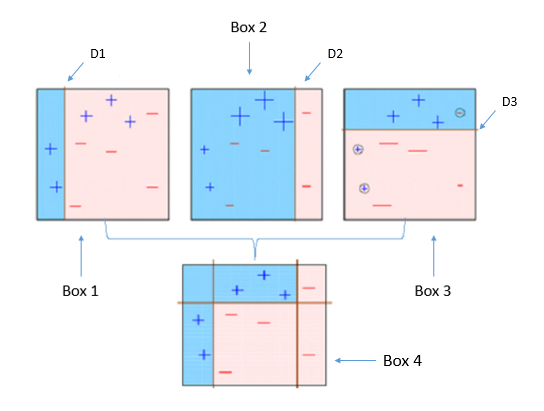

In [ ]:
#2. AdaBoost

from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), learning_rate=0.5, 
                            n_estimators=350, random_state=42)

ada_reg.fit(X_train, y_train)

y_pred = ada_reg.predict(X_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Test MSE : {np.around(MSE, 3)}')
print(f'Test RMSE: {np.around(RMSE, 3)}')

### 3.4 GradientBoost
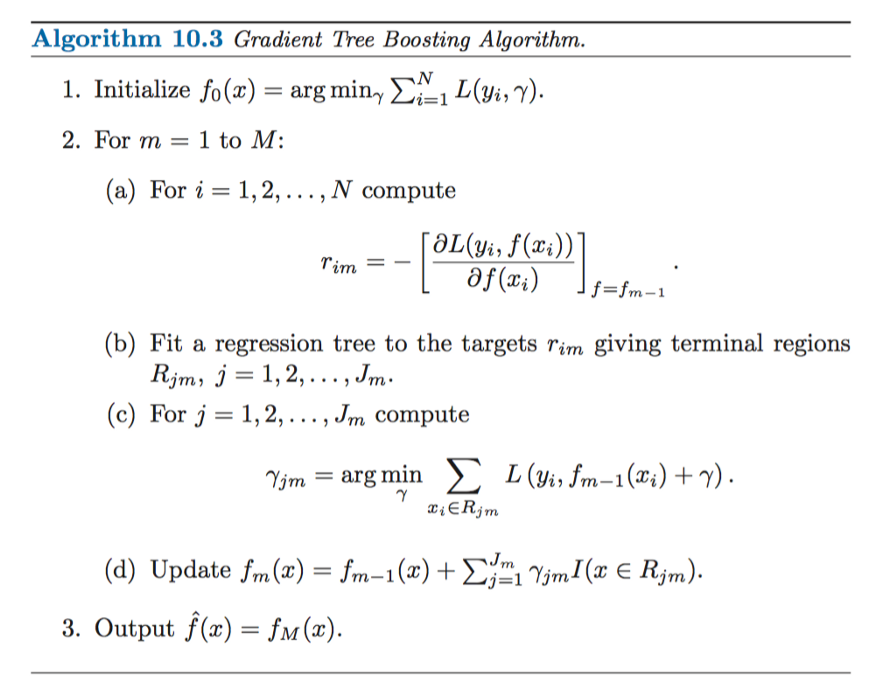

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=3, n_estimators=350, learning_rate=0.5, random_state=42)
gb_reg.fit(X_train, y_train)


y_pred = gb_reg.predict(X_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Test MSE : {np.around(MSE, 3)}')
print(f'Test RMSE: {np.around(RMSE, 3)}')

### 3.4 XGboost

In [ ]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=350, learning_rate=0.5, random_state=42)
xgb_reg.fit(X_train, y_train)


y_pred = xgb_reg.predict(X_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Test MSE : {np.around(MSE, 3)}')
print(f'Test RMSE: {np.around(RMSE, 3)}')

### 3.5 LightGBM

In [ ]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor(max_depth=3, n_estimators=350, learning_rate=0.5, random_state=42)
lgb_reg.fit(X_train, y_train)


y_pred = lgb_reg.predict(X_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'Test MSE : {np.around(MSE, 3)}')
print(f'Test RMSE: {np.around(RMSE, 3)}')

## 4. Conclusion

Decision Tree model has some advantages :
    - Simple to understand and interpret
    - Able to handle both numerical and categorical data
    - Useful in data exploration
    - Require little data preparation
    - Non-parametric method
    - Possible to validate a model using statistical tests
    
But it also has some disadvantages too :
    - Trees can be very non-robust 
    - Overfitting
    
To overcome decision tree's disadvantages, we can build Random forest or other Ensemble models, and they are even perform very well and the improvement is proved by this ML processing (decreasing RMSE).

When we build model, if we want to find out which Ensemble model does perform well in our data, we should look into data types, appropriate model kinds and tuning hyperparameter in further ML processing.  